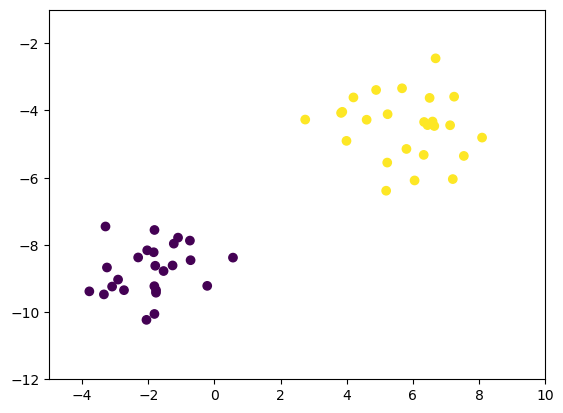

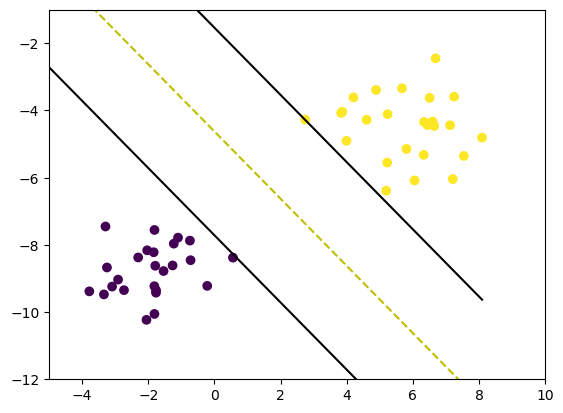

1,  1,  -1,  1,  -1,  

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math
import sklearn
from sklearn.datasets import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}
w=[] 
b=[] 

max_feature_value=float('-inf')
min_feature_value=float('+inf')
        
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

def SVM_Training(data_dict):
    i=1
    global w
    global b
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms: 
                    w_t = w*transformation
                    
                    correctly_classified = True
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] 
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2

SVM_Training(data_dict)

colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def visualize(data_dict):
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.axis([-5,10,-12,-1])
        plt.show()

visualize(data_dict)

def predict(features):
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

l=[]
for xi in X:
    
    l.append(predict(xi[:6]))
l=np.array(l).astype(int)
l